In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data.txt")

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df = df[(df['Target'] == 'Graduate') | (df['Target'] == 'Dropout')]

In [5]:
df['Target'] = df['Target'].map({'Dropout': 0, 'Graduate': 1})

In [6]:
df.reset_index(inplace=True)

In [7]:
df.drop('index',inplace=True,axis=1)

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Target',axis=1)
y = df['Target']

In [12]:
scaler = MinMaxScaler()

In [13]:
X_transform = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=101)

In [15]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [16]:
fit = bestfeatures.fit(X_transform,y)

In [17]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [18]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [19]:
featureScores.columns = ['Specs','Score']

In [20]:
print(featureScores.sort_values(ascending=False,by='Score'))

                                             Specs       Score
18                              Scholarship holder  260.724932
15                                          Debtor  229.692794
31                Curricular units 2nd sem (grade)  214.399992
30             Curricular units 2nd sem (approved)  171.768316
17                                          Gender  151.148802
25                Curricular units 1st sem (grade)  126.200550
16                         Tuition fees up to date   95.006019
24             Curricular units 1st sem (approved)   94.028043
1                                 Application mode   67.006863
19                               Age at enrollment   46.373536
13                                       Displaced   26.035663
0                                   Marital status   14.941084
32  Curricular units 2nd sem (without evaluations)   12.540434
5                           Previous qualification    9.547234
26  Curricular units 1st sem (without evaluations)    6

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [22]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.00452652, 0.02490071, 0.01195753, 0.02629326, 0.00399141,
       0.00587469, 0.01873697, 0.00236591, 0.01589454, 0.01504889,
       0.01595762, 0.01614409, 0.01884998, 0.00979614, 0.00162956,
       0.02798974, 0.09012433, 0.02373305, 0.03665413, 0.02297921,
       0.00235709, 0.00791434, 0.01862809, 0.02192033, 0.07391692,
       0.0719122 , 0.00573139, 0.00668199, 0.01998968, 0.0307596 ,
       0.16479312, 0.13194006, 0.00531377, 0.01512047, 0.014033  ,
       0.0155397 ])

In [23]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)

In [87]:
feat_importances.sort_values()

Educational special needs                         0.001630
International                                     0.002357
Nacionality                                       0.002366
Daytime/evening attendance\t                      0.003991
Marital status                                    0.004527
Curricular units 2nd sem (without evaluations)    0.005314
Curricular units 1st sem (without evaluations)    0.005731
Previous qualification                            0.005875
Curricular units 2nd sem (credited)               0.006682
Curricular units 1st sem (credited)               0.007914
Displaced                                         0.009796
Application order                                 0.011958
Inflation rate                                    0.014033
Father's qualification                            0.015049
Unemployment rate                                 0.015120
GDP                                               0.015540
Mother's qualification                            0.0158

<AxesSubplot:>

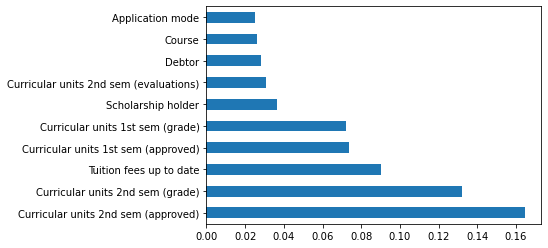

In [25]:
feat_importances.nlargest(10).plot(kind='barh')

In [26]:
model = SelectFromModel(clf, prefit=True)

In [27]:
X_new = model.transform(X)

In [28]:
X_new.shape

(3630, 8)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)

# Buidling Model After Feature Selection

### Logistic Regression

In [30]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.8897895162922485

In [31]:
scores.mean()

0.8897895162922485

In [32]:
predictions = model.predict(X_test)

In [33]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8772954924874792


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       476
           1       0.88      0.92      0.90       722

    accuracy                           0.88      1198
   macro avg       0.87      0.87      0.87      1198
weighted avg       0.88      0.88      0.88      1198



[[390  86]
 [ 61 661]]


### KNN

In [34]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

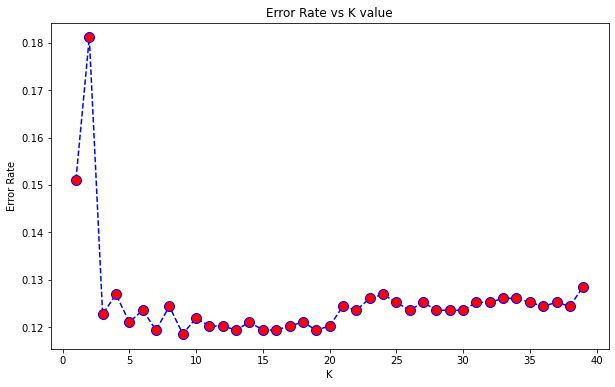

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [80]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
predictions = model.predict(X_test)

In [81]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8814691151919867


              precision    recall  f1-score   support

           0       0.91      0.78      0.84       476
           1       0.87      0.95      0.91       722

    accuracy                           0.88      1198
   macro avg       0.89      0.86      0.87      1198
weighted avg       0.88      0.88      0.88      1198



[[372 104]
 [ 38 684]]


In [83]:
model = KNeighborsClassifier(n_neighbors=9)

In [84]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [85]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.8741584024826284

### Decision Tree

In [39]:
dtree = DecisionTreeClassifier()

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
predictions = dtree.predict(X_test)

In [42]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8472454090150251


              precision    recall  f1-score   support

           0       0.80      0.82      0.81       476
           1       0.88      0.86      0.87       722

    accuracy                           0.85      1198
   macro avg       0.84      0.84      0.84      1198
weighted avg       0.85      0.85      0.85      1198



[[391  85]
 [ 98 624]]


In [43]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.8425285030020913

### Random Forest

In [44]:
rfc = RandomForestClassifier(n_estimators=200)

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [46]:
predictions = rfc.predict(X_test)

In [47]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8914858096828047


              precision    recall  f1-score   support

           0       0.89      0.83      0.86       476
           1       0.89      0.93      0.91       722

    accuracy                           0.89      1198
   macro avg       0.89      0.88      0.89      1198
weighted avg       0.89      0.89      0.89      1198



[[395  81]
 [ 49 673]]


In [48]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.8922569655265467

### Support Vector Machine

In [49]:
model = SVC()

In [50]:
model.fit(X_train,y_train)

SVC()

In [51]:
predictions = model.predict(X_test)

In [52]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8831385642737897


              precision    recall  f1-score   support

           0       0.89      0.80      0.84       476
           1       0.88      0.94      0.91       722

    accuracy                           0.88      1198
   macro avg       0.89      0.87      0.88      1198
weighted avg       0.88      0.88      0.88      1198



[[381  95]
 [ 45 677]]


In [53]:
model = SVC()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.8860841260203737

### Grid Search CV

In [54]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [55]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [56]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.

[CV 3/5] END ................................C=1000, gamma=1; total time=   0.1s
[CV 4/5] END ................................C=1000, gamma=1; total time=   0.1s
[CV 5/5] END ................................C=1000, gamma=1; total time=   0.1s
[CV 1/5] END ..............................C=1000, gamma=0.1; total time=   0.6s
[CV 2/5] END ..............................C=1000, gamma=0.1; total time=   0.3s
[CV 3/5] END ..............................C=1000, gamma=0.1; total time=   0.3s
[CV 4/5] END ..............................C=1000, gamma=0.1; total time=   0.4s
[CV 5/5] END ..............................C=1000, gamma=0.1; total time=   0.4s
[CV 1/5] END .............................C=1000, gamma=0.01; total time=   0.4s
[CV 2/5] END .............................C=1000, gamma=0.01; total time=   0.4s
[CV 3/5] END .............................C=1000, gamma=0.01; total time=   0.4s
[CV 4/5] END .............................C=1000, gamma=0.01; total time=   0.3s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [57]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [58]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [59]:
grid.best_score_

0.8996628387456587

In [60]:
predictions = grid.predict(X_test)

In [61]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8956594323873122


              precision    recall  f1-score   support

           0       0.90      0.83      0.86       476
           1       0.89      0.94      0.92       722

    accuracy                           0.90      1198
   macro avg       0.90      0.88      0.89      1198
weighted avg       0.90      0.90      0.89      1198



[[393  83]
 [ 42 680]]


### Naive Bayes

In [62]:
gnb = GaussianNB()

In [63]:
gnb.fit(X_train,y_train)

GaussianNB()

In [64]:
predictions = gnb.predict(X_test)

In [65]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8447412353923205


              precision    recall  f1-score   support

           0       0.87      0.71      0.78       476
           1       0.83      0.93      0.88       722

    accuracy                           0.84      1198
   macro avg       0.85      0.82      0.83      1198
weighted avg       0.85      0.84      0.84      1198



[[339 137]
 [ 49 673]]


In [66]:
model = GaussianNB()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.8478631181272347

### XGBoost

In [67]:
xgb_cl = xgb.XGBClassifier()

In [68]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [69]:
predictions = xgb_cl.predict(X_test)

In [70]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8823038397328882


              precision    recall  f1-score   support

           0       0.87      0.83      0.85       476
           1       0.89      0.92      0.90       722

    accuracy                           0.88      1198
   macro avg       0.88      0.87      0.88      1198
weighted avg       0.88      0.88      0.88      1198



[[395  81]
 [ 60 662]]


In [71]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.88814511232544

### Neural Network

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
model = Sequential()

# input layer
model.add(Dense(units=36,activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(units=18,activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# compiler
model.compile(loss='binary_crossentropy', optimizer='adam')

In [74]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [75]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
76/76 [==============================] - 1s 3ms/step - loss: 0.9969 - val_loss: 0.5551
Epoch 2/600
76/76 [==============================] - 0s 1ms/step - loss: 0.7157 - val_loss: 0.5292
Epoch 3/600
76/76 [==============================] - 0s 1ms/step - loss: 0.5785 - val_loss: 0.4513
Epoch 4/600
76/76 [==============================] - 0s 1ms/step - loss: 0.5245 - val_loss: 0.4235
Epoch 5/600
76/76 [==============================] - 0s 1ms/step - loss: 0.4879 - val_loss: 0.3993
Epoch 6/600
76/76 [==============================] - 0s 1ms/step - loss: 0.4687 - val_loss: 0.3922
Epoch 7/600
76/76 [==============================] - 0s 1ms/step - loss: 0.4588 - val_loss: 0.3729
Epoch 8/600
76/76 [==============================] - 0s 2ms/step - loss: 0.4215 - val_loss: 0.3608
Epoch 9/600
76/76 [==============================] - 0s 1ms/step - loss: 0.4269 - val_loss: 0.3622
Epoch 10/600
76/76 [==============================] - 0s 1ms/step - loss: 0.4037 - val_loss: 0.3526
Epoch 11/

76/76 [==============================] - 0s 1ms/step - loss: 0.3160 - val_loss: 0.2999
Epoch 84/600
76/76 [==============================] - 0s 1ms/step - loss: 0.3002 - val_loss: 0.3044
Epoch 85/600
76/76 [==============================] - 0s 1ms/step - loss: 0.3087 - val_loss: 0.3021
Epoch 86/600
76/76 [==============================] - 0s 1ms/step - loss: 0.3060 - val_loss: 0.3004
Epoch 87/600
76/76 [==============================] - 0s 1ms/step - loss: 0.3109 - val_loss: 0.2996
Epoch 88/600
76/76 [==============================] - 0s 1ms/step - loss: 0.3097 - val_loss: 0.2978
Epoch 89/600
76/76 [==============================] - 0s 1ms/step - loss: 0.3045 - val_loss: 0.2978
Epoch 90/600
76/76 [==============================] - 0s 1ms/step - loss: 0.3062 - val_loss: 0.3008
Epoch 91/600
76/76 [==============================] - 0s 1ms/step - loss: 0.3047 - val_loss: 0.2993
Epoch 92/600
76/76 [==============================] - 0s 1ms/step - loss: 0.3099 - val_loss: 0.2985
Epoch 93/600


<AxesSubplot:>

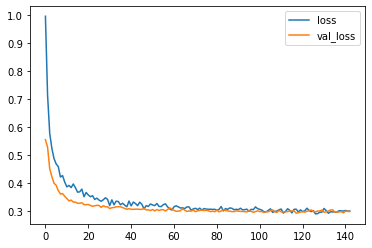

In [76]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [77]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [78]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8889816360601002


              precision    recall  f1-score   support

           0       0.90      0.81      0.85       476
           1       0.88      0.94      0.91       722

    accuracy                           0.89      1198
   macro avg       0.89      0.87      0.88      1198
weighted avg       0.89      0.89      0.89      1198



[[384  92]
 [ 41 681]]
